In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import json

In [2]:
tex_rc_params = {
    'backend': 'ps',
    #'text.latex.preamble': [r'\usepackage{gensymb}'],
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    #'text.usetex': True,
    'font.family': 'serif',
}

%matplotlib inline
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

In [3]:
with open('jc.txt') as file_jc:
    jc = json.load(file_jc)
with open('zz.txt') as file_zz:
    zz = json.load(file_zz)
with open('transm_freq.txt') as file_freq:
    transm_freq = json.load(file_freq)
with open('zz_sw.txt') as file_zz_sw:
    zz_sw = json.load(file_zz_sw)

In [4]:
def plot_zz(
    jc: dict,
    transm_freq: list,
    zz: dict,
    zz_sw: dict,
    tex_rc_params: dict,
    save=False,
):
    with plt.rc_context(tex_rc_params):
        fig, ax = plt.subplots( 
            figsize=(3.39, 2.6189190273276797), 
            constrained_layout=True
        )
        matplotlib.rcParams['mathtext.fontset'] = 'cm'
        cmap_red = matplotlib.cm.get_cmap('Reds')
        colors_dict = {"0": cmap_red(0.4), '1': cmap_red(0.8), '2':cmap_red(1.0)}
        for key in jc.keys():
            ax.semilogy(transm_freq, np.array(zz[key])*1e6,
                        color=colors_dict[key], label='$J_C/ 2 \\pi = {}  \, \\mathrm{{MHz}}$'.format(jc[key]*1e3))
            ax.semilogy(transm_freq, np.array(zz_sw[key])*1e6, 
                        color=colors_dict[key], linestyle='--')
        ax.set_xlabel('$\\omega_t/2 \\pi \\, (\\mathrm{GHz})$')
        x_ticks = [4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8]
        x_ticks_latex = ['$4.2$', '$4.4$', '$4.6$', '$4.8$', '$5.0$', '$5.2$', '$5.4$', '$5.6$', '$5.8$']
        plt.xticks(x_ticks, x_ticks_latex)
        y_ticks = [100, 10]
        y_ticks_latex = ['$10^{2}$', '$10^{1}$']
        plt.yticks(y_ticks, y_ticks_latex)
        ax.set_ylabel('$\\xi_{ZZ}/2 \\pi \, (\\mathrm{kHz})$')
        ax.tick_params(axis='both')
        plt.legend(loc='lower left')
        if save:
            plt.savefig("zz_fig.svg")
            plt.savefig("zz_fig.pdf")
        plt.show()

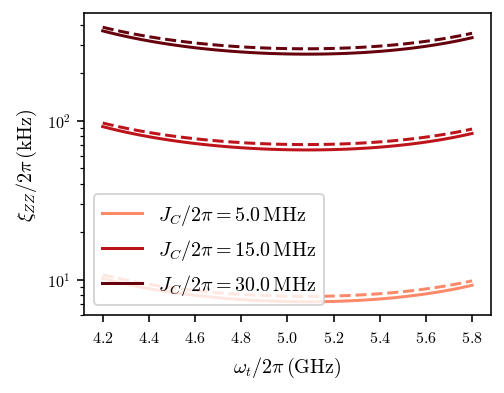

In [5]:
plot_zz(jc, transm_freq, zz, zz_sw, tex_rc_params, save=False)